# Selfie Sorting and Organization Tool

This notebook organizes selfies from an unsorted folder into yearly folders, identifies duplicates and missing days, and prepares them for timelapse processing.

In [33]:
!pip install pandas matplotlib
# Import required libraries
import os
import shutil
from pathlib import Path
from datetime import datetime, timedelta
import re
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt

print("✅ All libraries imported successfully")

✅ All libraries imported successfully



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 1: Read Selfies from "1_unsorted_selfies"

Load all selfie images from the unsorted folder and parse their filenames to extract date information.

In [34]:
# Step 1: Read selfies from "1_unsorted_selfies"
print("=== STEP 1: READING SELFIES ===")

# Define directories
base_dir = Path.cwd()
unsorted_dir = base_dir / "1_unsorted_selfies"
sorted_dir = base_dir / "2_sorted_selfies"

print(f"Base directory: {base_dir}")
print(f"Unsorted selfies directory: {unsorted_dir}")
print(f"Sorted selfies directory: {sorted_dir}")

# Check if unsorted directory exists
if not unsorted_dir.exists():
    print(f"❌ Directory not found: {unsorted_dir}")
    print("Please create the '1_unsorted_selfies' directory and add your selfie images")
else:
    print(f"✅ Found unsorted directory: {unsorted_dir}")

# Get all image files
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
image_files = []

if unsorted_dir.exists():
    for ext in image_extensions:
        # Search for  lowercase file extension
        image_files.extend(list(unsorted_dir.glob(f'*{ext}')))

print(f"\n📁 Found {len(image_files)} image files")

# Parse filename format: IMG_YYYYMMDD_HHMMSS or IMGYYYYMMDDHHMMSS
def parse_selfie_filename(filename):
    """
    Parse selfie filename to extract date information.
    Expected formats: 
    1. IMG_YYYYMMDD_HHMMSS.jpg (e.g., IMG_20231104_133736.jpg)
    2. IMGYYYYMMDDHHMMSS.jpg (e.g., IMG20250714121344.jpg)
    
    Returns:
        dict with parsed information or None if format doesn't match
    """
    # Pattern 1: IMG_YYYYMMDD_HHMMSS (with underscores)
    pattern1 = r'IMG_(\d{4})(\d{2})(\d{2})_(\d{2})(\d{2})(\d{2})'
    match1 = re.search(pattern1, filename)
    
    # Pattern 2: IMGYYYYMMDDHHMMSS (without underscores)
    pattern2 = r'IMG(\d{4})(\d{2})(\d{2})(\d{2})(\d{2})(\d{2})'
    match2 = re.search(pattern2, filename)
    
    match = match1 or match2
    
    if match:
        year, month, day, hour, minute, second = match.groups()
        try:
            # Validate date
            date_obj = datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
            return {
                'filename': filename,
                'year': int(year),
                'month': int(month),
                'day': int(day),
                'hour': int(hour),
                'minute': int(minute),
                'second': int(second),
                'date': date_obj,
                'date_str': date_obj.strftime('%Y-%m-%d'),
                'datetime_str': date_obj.strftime('%Y-%m-%d %H:%M:%S'),
                'format': 'underscore' if match1 else 'no_underscore'
            }
        except ValueError:
            return None
    return None

# Parse all filenames
parsed_files = []
unparseable_files = []

for img_path in image_files:
    parsed = parse_selfie_filename(img_path.name)
    if parsed:
        parsed['path'] = img_path
        parsed_files.append(parsed)
    else:
        unparseable_files.append(img_path.name)

print(f"\n📊 Filename Parsing Results:")
print(f"✅ Successfully parsed: {len(parsed_files)} files")
print(f"❌ Failed to parse: {len(unparseable_files)} files")

if parsed_files:
    # Show breakdown by format
    format_counts = {'underscore': 0, 'no_underscore': 0}
    for file_info in parsed_files:
        format_counts[file_info['format']] += 1
    
    print(f"\n📋 Format breakdown:")
    print(f"   IMG_YYYYMMDD_HHMMSS format: {format_counts['underscore']} files")
    print(f"   IMGYYYYMMDDHHMMSS format: {format_counts['no_underscore']} files")

if unparseable_files:
    print(f"\nUnparseable files:")
    for filename in unparseable_files[:10]:  # Show first 10
        print(f"  - {filename}")
    if len(unparseable_files) > 10:
        print(f"  ... and {len(unparseable_files) - 10} more")

# Sort by date
parsed_files.sort(key=lambda x: x['date'])

if parsed_files:
    print(f"\n📅 Date Range:")
    first_date = parsed_files[0]['date_str']
    last_date = parsed_files[-1]['date_str']
    print(f"   First selfie: {first_date} ({parsed_files[0]['filename']})")
    print(f"   Last selfie:  {last_date} ({parsed_files[-1]['filename']})")
    
    # Calculate total span
    date_span = parsed_files[-1]['date'] - parsed_files[0]['date']
    print(f"   Total span: {date_span.days} days")
    
    # Show sample files
    print(f"\n📋 Sample files (first 5):")
    for i, file_info in enumerate(parsed_files[:5]):
        print(f"  {i+1}. {file_info['filename']} → {file_info['datetime_str']}")
    
    if len(parsed_files) > 5:
        print(f"  ... and {len(parsed_files) - 5} more files")

else:
    print("❌ No valid selfie files found with the expected format IMG_YYYYMMDD_HHMMSS")

=== STEP 1: READING SELFIES ===
Base directory: c:\Users\Chimeng62\Desktop\daily_selfie_preporcessor_notebook
Unsorted selfies directory: c:\Users\Chimeng62\Desktop\daily_selfie_preporcessor_notebook\1_unsorted_selfies
Sorted selfies directory: c:\Users\Chimeng62\Desktop\daily_selfie_preporcessor_notebook\2_sorted_selfies
✅ Found unsorted directory: c:\Users\Chimeng62\Desktop\daily_selfie_preporcessor_notebook\1_unsorted_selfies

📁 Found 904 image files

📊 Filename Parsing Results:
✅ Successfully parsed: 904 files
❌ Failed to parse: 0 files

📋 Format breakdown:
   IMG_YYYYMMDD_HHMMSS format: 811 files
   IMGYYYYMMDDHHMMSS format: 93 files

📅 Date Range:
   First selfie: 2022-12-31 (IMG_20221231_214819.jpg)
   Last selfie:  2025-08-23 (IMG20250823120136.jpg)
   Total span: 965 days

📋 Sample files (first 5):
  1. IMG_20221231_214819.jpg → 2022-12-31 21:48:19
  2. IMG_20230102_203909.jpg → 2023-01-02 20:39:09
  3. IMG_20230104_142640.jpg → 2023-01-04 14:26:40
  4. IMG_20230105_144723.jpg

## Step 2: Find Daily Duplicates and Missing Days

Analyze the selfie collection to identify days with multiple selfies (duplicates) and days where no selfie was taken (missing days). Goal: one selfie per day for a consistent timelapse.

In [35]:
# Step 2: Find daily duplicates and missing days
print("=== STEP 2: ANALYZING DAILY COVERAGE ===")

if not parsed_files:
    print("❌ No parsed files available from Step 1")
else:
    # Group files by date
    files_by_date = defaultdict(list)
    for file_info in parsed_files:
        files_by_date[file_info['date_str']].append(file_info)
    
    print(f"📊 Daily Analysis:")
    print(f"   Total unique dates: {len(files_by_date)}")
    print(f"   Total files: {len(parsed_files)}")
    
    # Find duplicates (days with multiple selfies)
    duplicate_dates = {date: files for date, files in files_by_date.items() if len(files) > 1}
    single_dates = {date: files[0] for date, files in files_by_date.items() if len(files) == 1}
    
    print(f"\n🔍 Duplicate Analysis:")
    print(f"   Days with multiple selfies: {len(duplicate_dates)}")
    print(f"   Days with single selfie: {len(single_dates)}")
    
    if duplicate_dates:
        print(f"\n📋 Days with multiple selfies (need manual selection):")
        for date, files in duplicate_dates.items():
            print(f"\n   📅 {date}: {len(files)} selfies")
            for i, file_info in enumerate(files, 1):
                print(f"      {i}. {file_info['filename']} ({file_info['datetime_str']})")
        
        print(f"\n⚠️  ACTION REQUIRED:")
        print(f"   Please manually select the best selfie for each duplicate date.")
        print(f"   You can delete unwanted files from '1_unsorted_selfies' folder")
        print(f"   or note which ones to use for Step 4.")
    
    # Find missing days (gaps in the date range)
    if parsed_files:
        start_date = parsed_files[0]['date'].date()
        end_date = parsed_files[-1]['date'].date()
        
        # Generate all dates in the range
        all_dates_in_range = []
        current_date = start_date
        while current_date <= end_date:
            all_dates_in_range.append(current_date.strftime('%Y-%m-%d'))
            current_date += timedelta(days=1)
        
        # Find missing dates
        existing_dates = set(files_by_date.keys())
        missing_dates = [date for date in all_dates_in_range if date not in existing_dates]
        
        print(f"\n📅 Missing Days Analysis:")
        print(f"   Date range: {start_date} to {end_date}")
        print(f"   Total days in range: {len(all_dates_in_range)}")
        print(f"   Days with selfies: {len(existing_dates)}")
        print(f"   Missing days: {len(missing_dates)}")
        print(f"   Coverage: {(len(existing_dates)/len(all_dates_in_range)*100):.1f}%")
        
        if missing_dates:
            print(f"\n📋 Missing dates (first 20):")
            for date in missing_dates[:20]:
                print(f"   - {date}")
            if len(missing_dates) > 20:
                print(f"   ... and {len(missing_dates) - 20} more missing dates")
    
    # Create a summary DataFrame for visualization
    summary_data = []
    for date, files in files_by_date.items():
        # For duplicates, just take the first one for analysis purposes
        file_info = files[0]
        summary_data.append({
            'date': date,
            'year': file_info['year'],
            'month': file_info['month'],
            'filename': file_info['filename'],
            'time': file_info['datetime_str'].split()[1],
            'duplicate_count': len(files)
        })
    
    df = pd.DataFrame(summary_data)
    
    # Show monthly distribution
    monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
    print(f"\n📈 Monthly Distribution:")
    for _, row in monthly_counts.head(12).iterrows():
        month_name = datetime(int(row['year']), int(row['month']), 1).strftime('%B')
        print(f"   {row['year']}-{month_name}: {row['count']} days with selfies")
    
    if len(monthly_counts) > 12:
        print(f"   ... and {len(monthly_counts) - 12} more months")
    
    # Store data for next steps
    duplicate_summary = {
        'files_by_date': files_by_date,
        'duplicate_dates': duplicate_dates,
        'single_dates': single_dates,
        'missing_dates': missing_dates if 'missing_dates' in locals() else [],
        'total_days_with_selfies': len(files_by_date)
    }

=== STEP 2: ANALYZING DAILY COVERAGE ===
📊 Daily Analysis:
   Total unique dates: 889
   Total files: 904

🔍 Duplicate Analysis:
   Days with multiple selfies: 13
   Days with single selfie: 876

📋 Days with multiple selfies (need manual selection):

   📅 2023-03-18: 2 selfies
      1. IMG_20230318_125837.jpg (2023-03-18 12:58:37)
      2. IMG_20230318_134540.jpg (2023-03-18 13:45:40)

   📅 2023-07-31: 2 selfies
      1. IMG_20230731_130058.jpg (2023-07-31 13:00:58)
      2. IMG_20230731_193707.jpg (2023-07-31 19:37:07)

   📅 2023-11-07: 2 selfies
      1. IMG_20231107_141915.jpg (2023-11-07 14:19:15)
      2. IMG_20231107_141916.jpg (2023-11-07 14:19:16)

   📅 2023-11-14: 2 selfies
      1. IMG_20231114_141431.jpg (2023-11-14 14:14:31)
      2. IMG_20231114_141433.jpg (2023-11-14 14:14:33)

   📅 2023-12-02: 2 selfies
      1. IMG_20231202_130214.jpg (2023-12-02 13:02:14)
      2. IMG_20231202_130217.jpg (2023-12-02 13:02:17)

   📅 2024-03-11: 3 selfies
      1. IMG_20240311_120748.jpg

## Step 3: Show Year Distribution

Display the distribution of selfies by year and provide analysis of the collection.

=== STEP 3: YEAR DISTRIBUTION ANALYSIS ===
📊 Year Distribution:
   Total years covered: 4
   Year range: 2022 - 2025
   Total days with selfies: 889

📈 Days with selfies per year:
   2022: 1 days with selfies
      Range: 2022-12-31 to 2022-12-31
   2023: 341 days with selfies
      (5 days have duplicates)
      Range: 2023-01-02 to 2023-12-31
   2024: 324 days with selfies
      (5 days have duplicates)
      Range: 2024-01-01 to 2024-12-31
   2025: 223 days with selfies
      (3 days have duplicates)
      Range: 2025-01-01 to 2025-08-23


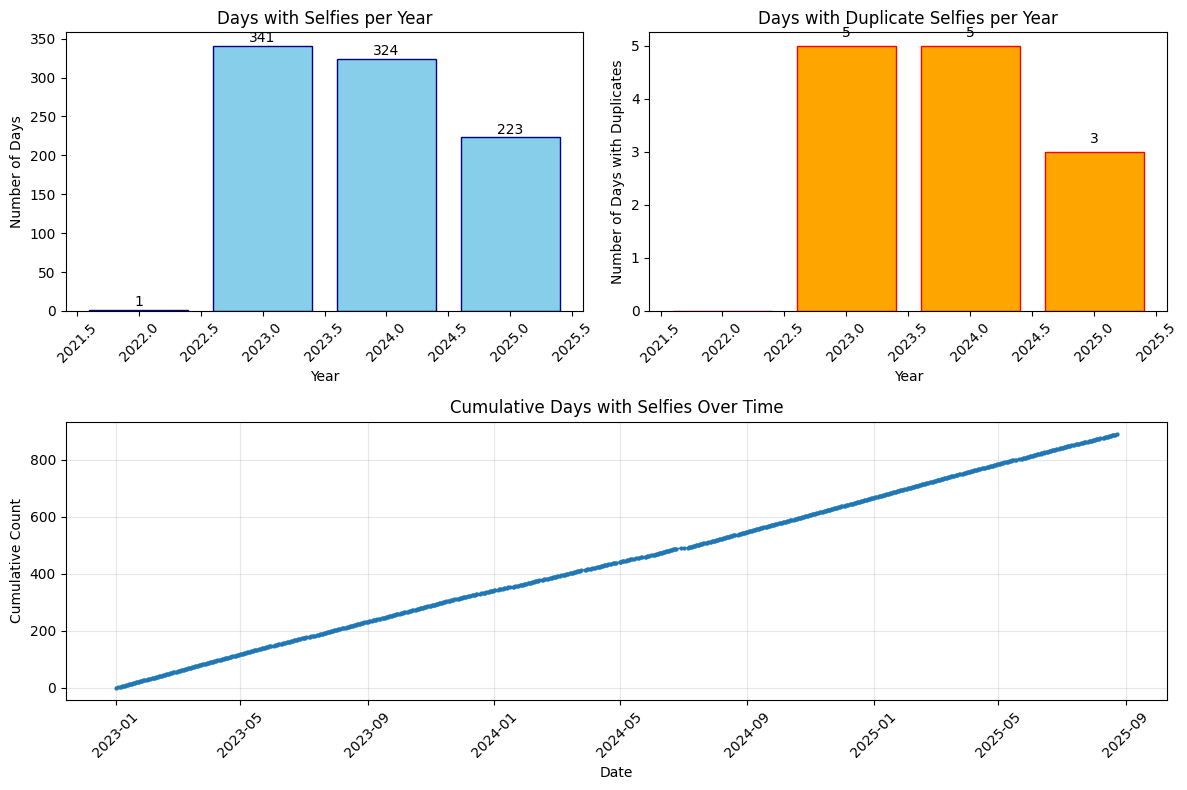


🎯 Summary Statistics:
   Total days with selfies: 889
   Days with single selfie: 876
   Days with duplicate selfies: 13
   Years covered: 4 (2022-2025)
   Average days with selfies per year: 222.2
   Missing days in range: 78

💡 Next Steps:
   1. Review duplicate dates listed in Step 2
   2. Manually select best selfies for duplicate dates
   3. Run Step 4 to copy organized files to sorted folders


In [36]:
# Step 3: Show year distribution
print("=== STEP 3: YEAR DISTRIBUTION ANALYSIS ===")

if 'duplicate_summary' not in locals():
    print("❌ No analysis data available from Step 2")
else:
    files_by_date = duplicate_summary['files_by_date']
    
    # Group files by year (using first file from each date for analysis)
    files_by_year = defaultdict(list)
    for date, files in files_by_date.items():
        # Take first file for each date for year analysis
        file_info = files[0]
        files_by_year[file_info['year']].append({
            'date': date,
            'file_count': len(files),  # Track if this date has duplicates
            'file_info': file_info
        })
    
    # Sort years
    years = sorted(files_by_year.keys())
    
    print(f"📊 Year Distribution:")
    print(f"   Total years covered: {len(years)}")
    print(f"   Year range: {years[0]} - {years[-1]}")
    print(f"   Total days with selfies: {len(files_by_date)}")
    
    # Detailed year breakdown
    print(f"\n📈 Days with selfies per year:")
    year_counts = {}
    year_duplicates = {}
    
    for year in years:
        year_data = files_by_year[year]
        total_days = len(year_data)
        days_with_duplicates = len([d for d in year_data if d['file_count'] > 1])
        
        year_counts[year] = total_days
        year_duplicates[year] = days_with_duplicates
        
        print(f"   {year}: {total_days} days with selfies")
        if days_with_duplicates > 0:
            print(f"      ({days_with_duplicates} days have duplicates)")
        
        # Show date range for this year
        year_dates = [d['date'] for d in year_data]
        year_dates.sort()
        first_date = year_dates[0]
        last_date = year_dates[-1]
        print(f"      Range: {first_date} to {last_date}")
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Bar chart of days with selfies per year
    plt.subplot(2, 2, 1)
    bars = plt.bar(years, [year_counts[year] for year in years], color='skyblue', edgecolor='navy')
    plt.title('Days with Selfies per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Days')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar, year in zip(bars, years):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom')
    
    # Duplicate days per year
    plt.subplot(2, 2, 2)
    duplicate_counts = [year_duplicates[year] for year in years]
    bars = plt.bar(years, duplicate_counts, color='orange', edgecolor='red')
    plt.title('Days with Duplicate Selfies per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Days with Duplicates')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar, count in zip(bars, duplicate_counts):
        if count > 0:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')
    
    # Timeline plot of all selfie dates
    plt.subplot(2, 1, 2)
    all_dates = []
    for files in files_by_date.values():
        all_dates.append(files[0]['date'])
    all_dates.sort()
    
    # Create cumulative count
    cumulative_counts = list(range(1, len(all_dates) + 1))
    plt.plot(all_dates, cumulative_counts, marker='o', markersize=2, linewidth=1)
    plt.title('Cumulative Days with Selfies Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Count')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    total_days = len(files_by_date)
    total_duplicates = len(duplicate_summary['duplicate_dates'])
    
    print(f"\n🎯 Summary Statistics:")
    print(f"   Total days with selfies: {total_days}")
    print(f"   Days with single selfie: {total_days - total_duplicates}")
    print(f"   Days with duplicate selfies: {total_duplicates}")
    print(f"   Years covered: {len(years)} ({years[0]}-{years[-1]})")
    
    # Calculate average days per year
    avg_per_year = total_days / len(years)
    print(f"   Average days with selfies per year: {avg_per_year:.1f}")
    
    if duplicate_summary['missing_dates']:
        print(f"   Missing days in range: {len(duplicate_summary['missing_dates'])}")
    
    print(f"\n💡 Next Steps:")
    print(f"   1. Review duplicate dates listed in Step 2")
    print(f"   2. Manually select best selfies for duplicate dates")
    print(f"   3. Run Step 4 to copy organized files to sorted folders")
    
    # Store year analysis for Step 4
    year_analysis = {
        'years': years,
        'year_counts': year_counts,
        'year_duplicates': year_duplicates,
        'files_by_year': files_by_year
    }

## Step 4: Copy Selected Files to Sorted Folders

After manually resolving duplicates, copy the final selected selfies to organized yearly folders in "2_sorted_selfies". Run this step after you've handled the duplicate dates from Step 2.

In [37]:
# Step 4: Copy selected files to sorted folders
print("=== STEP 4: COPYING TO SORTED FOLDERS ===")

if 'duplicate_summary' not in locals():
    print("❌ No analysis data available. Please run Steps 1-3 first.")
else:
    print("⚠️  IMPORTANT: Before running this step, make sure you have:")
    print("   1. Reviewed the duplicate dates from Step 2")
    print("   2. Manually selected/kept only the best selfie for each duplicate date")
    print("   3. Either deleted unwanted duplicates from '1_unsorted_selfies' or made note of which to copy")
    print()
    
    # Re-scan the unsorted directory to get current state after manual cleanup
    print("🔄 Re-scanning '1_unsorted_selfies' for current files...")
    
    # Get current image files (after user may have cleaned up duplicates)
    current_image_files = []
    if unsorted_dir.exists():
        for ext in image_extensions:
            current_image_files.extend(list(unsorted_dir.glob(f'*{ext}')))
    
    # Parse current files
    current_parsed_files = []
    for img_path in current_image_files:
        parsed = parse_selfie_filename(img_path.name)
        if parsed:
            parsed['path'] = img_path
            current_parsed_files.append(parsed)
    
    current_parsed_files.sort(key=lambda x: x['date'])
    
    print(f"📊 Current State:")
    print(f"   Files found: {len(current_image_files)}")
    print(f"   Successfully parsed: {len(current_parsed_files)}")
    
    # Group current files by date
    current_files_by_date = defaultdict(list)
    for file_info in current_parsed_files:
        current_files_by_date[file_info['date_str']].append(file_info)
    
    # Check for remaining duplicates and show warning but proceed anyway
    remaining_duplicates = {date: files for date, files in current_files_by_date.items() if len(files) > 1}
    
    if remaining_duplicates:
        print(f"\n⚠️  WARNING: Found {len(remaining_duplicates)} dates with multiple selfies:")
        for date, files in remaining_duplicates.items():
            print(f"   {date}: {[f['filename'] for f in files]} → will copy all files")
        print(f"\n📝 Note: For duplicates, copying all files for each date.")
    else:
        print(f"✅ No duplicates found - ready to copy files!")
    
    # Proceed with copying (copy all files, including duplicates)
    final_files = []
    for date, files in current_files_by_date.items():
        final_files.extend(files)  # Add all files for this date
    
    # Group by year for directory organization
    files_by_year = defaultdict(list)
    for file_info in final_files:
        files_by_year[file_info['year']].append(file_info)
    
    years = sorted(files_by_year.keys())
    
    print(f"\n📁 Creating sorted directory structure...")
    
    # Create main sorted directory
    sorted_dir.mkdir(exist_ok=True)
    print(f"✅ Created/verified: {sorted_dir}")
    
    # Create year subdirectories
    year_dirs = {}
    for year in years:
        year_dir = sorted_dir / str(year)
        year_dir.mkdir(exist_ok=True)
        year_dirs[year] = year_dir
        print(f"✅ Created/verified: {year_dir}")
    
    # Copy files to sorted directories
    print(f"\n📋 Copying {len(final_files)} files to sorted directories...")
    
    copied_files = []
    copy_errors = []
    
    for file_info in final_files:
        try:
            source_path = file_info['path']
            dest_dir = year_dirs[file_info['year']]
            dest_path = dest_dir / file_info['filename']
            
            # Copy file
            shutil.copy2(source_path, dest_path)
            copied_files.append({
                'source': source_path,
                'dest': dest_path,
                'year': file_info['year'],
                'date': file_info['date_str']
            })
            
        except Exception as e:
            copy_errors.append({
                'file': file_info['filename'],
                'error': str(e)
            })
            print(f"❌ Error copying {file_info['filename']}: {str(e)}")
    
    print(f"\n📊 Copy Results:")
    print(f"✅ Successfully copied: {len(copied_files)} files")
    print(f"❌ Copy errors: {len(copy_errors)}")
    
    if copy_errors:
        print(f"\nErrors:")
        for error in copy_errors:
            print(f"   - {error['file']}: {error['error']}")
    
    # Show final directory structure
    print(f"\n📁 Final Directory Structure:")
    print(f"{sorted_dir.name}/")
    for year in years:
        year_count = len([f for f in copied_files if f['year'] == year])
        print(f"├── {year}/ ({year_count} files)")
        
        # Show sample files in each year
        year_files = [f for f in copied_files if f['year'] == year][:3]
        for i, file_info in enumerate(year_files):
            prefix = "│   ├──" if i < len(year_files) - 1 else "│   └──"
            print(f"{prefix} {file_info['dest'].name}")
        
        if len([f for f in copied_files if f['year'] == year]) > 3:
            remaining = len([f for f in copied_files if f['year'] == year]) - 3
            print(f"│   └── ... and {remaining} more files")
    
    # Final summary statistics
    print(f"\n🎯 Final Summary:")
    print(f"   Original files found (Step 1): {len(parsed_files) if 'parsed_files' in locals() else 'N/A'}")
    print(f"   Total files copied (including duplicates): {len(final_files)}")
    print(f"   Successfully organized: {len(copied_files)}")
    print(f"   Years covered: {len(years)} ({years[0]}-{years[-1]})")
    
    # Calculate average selfies per year
    avg_per_year = len(copied_files) / len(years) if len(years) > 0 else 0
    print(f"   Average files per year: {avg_per_year:.1f}")
    
    # Suggest next steps
    print(f"\n🚀 Next Steps:")
    print(f"   1. Review organized files in: {sorted_dir}")
    print(f"   2. Use these organized files for face alignment processing")
    print(f"   3. Consider each year folder as input for timelapse creation")
    print(f"   4. Update face_alignment_preprocessor.ipynb to use these organized folders")
    
    print(f"\n🎉 SELFIE ORGANIZATION COMPLETED!")
    
    # Store final results
    final_organization_results = {
        'total_copied': len(copied_files),
        'years_covered': years,
        'files_by_year': {year: len([f for f in copied_files if f['year'] == year]) for year in years},
        'sorted_directory': str(sorted_dir),
        'copy_errors': len(copy_errors)
    }

=== STEP 4: COPYING TO SORTED FOLDERS ===
⚠️  IMPORTANT: Before running this step, make sure you have:
   1. Reviewed the duplicate dates from Step 2
   2. Manually selected/kept only the best selfie for each duplicate date
   3. Either deleted unwanted duplicates from '1_unsorted_selfies' or made note of which to copy

🔄 Re-scanning '1_unsorted_selfies' for current files...
📊 Current State:
   Files found: 904
   Successfully parsed: 904

⚠️  WARNING: Found 13 dates with multiple selfies:
   2023-03-18: ['IMG_20230318_125837.jpg', 'IMG_20230318_134540.jpg'] → will copy all files
   2023-07-31: ['IMG_20230731_130058.jpg', 'IMG_20230731_193707.jpg'] → will copy all files
   2023-11-07: ['IMG_20231107_141915.jpg', 'IMG_20231107_141916.jpg'] → will copy all files
   2023-11-14: ['IMG_20231114_141431.jpg', 'IMG_20231114_141433.jpg'] → will copy all files
   2023-12-02: ['IMG_20231202_130214.jpg', 'IMG_20231202_130217.jpg'] → will copy all files
   2024-03-11: ['IMG_20240311_120748.jpg', 'I